In [278]:
import pyfirmata
import time
import pandas as pd
import matplotlib.pyplot as plt
import heapq
from scipy.signal import find_peaks
import numpy as np 

# Defining the board, connection and pins

In [279]:
board = pyfirmata.Arduino('/dev/cu.usbserial-1410')
it = pyfirmata.util.Iterator(board)
it.start()
motMS1Pin  = board.get_pin('d:11:o')
motMS2Pin  = board.get_pin('d:10:o')
motMS3Pin  = board.get_pin('d:9:o')
motStepPin = board.get_pin('d:8:o')
motDirPin  = board.get_pin('d:7:o')
buttonRev     = board.get_pin('d:4:i')
buttonFrw     = board.get_pin('d:5:i')
buttonRun     = board.get_pin('d:6:i')
buttonPicture = board.get_pin('d:3:i')
laserInt = board.get_pin('a:5:i')

# Reading Laser intensity Only

In [297]:
milli_sec = []
analog_value = []
while True:
    analog_value.append([laserInt.read()])
    milli_sec.append([time.time()]) 
    time.sleep(0.0001)

KeyboardInterrupt: 

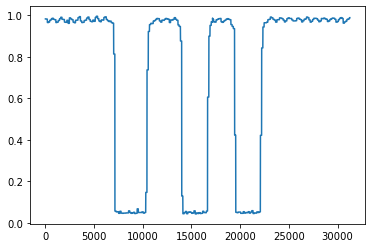

In [298]:
plt.plot(analog_value)

# Creating the dataset for Machine learning 

In [1008]:
print('Creating a data set for MAchine learning')
new_cols =['order','length','correction','stdH','stdL'] #data headers
data = pd.DataFrame([(0, 0,0,0,0)], columns=new_cols )

order=1
value=0
while True:
    #defining 4 buttons
    sw = board.digital[6].read()
    sww = board.digital[5].read()
    swww = board.digital[4].read()
    swwww = board.digital[3].read()
        
    if sw is False: #Next FRAME and subsequent laser reading 
        motDirPin.write(1)
        motMS1Pin.write(1)
        motMS2Pin.write(1)
        motMS3Pin.write(1)
        milli_sec = []
        analog_value = []
        for x in range(1776):
            analog_value.append([laserInt.read()])
            milli_sec.append([time.time()])
            motStepPin.write(1)
            time.sleep(0.000500)
            motStepPin.write(0)
            time.sleep(0.000500)
        else:
            time.sleep(0.4)
            a=[j for sub in analog_value for j in sub]
            arr = np.array(a)
            arr = (arr-np.min(arr))/np.max((arr-np.min(arr)))
            peaks, _ = find_peaks(arr,distance=150,height= np.mean(arr),prominence=0.004)
            arrIn= -1*(arr-np.min(arr) ) +np.max(arr) 
            peaksMin, _ = find_peaks(arrIn,distance=150,height= np.mean(arrIn),prominence=0.004)
            L  = []
            LL = []
            it = heapq.merge(peaks,peaksMin) #iterator consisting of merged elements of a and b
            L  = list(it) #list made of it
            LL = np.size(L)-1+abs(arr[0]-arr[L[0]-1])+abs(arr[-1]-arr[L[-1]+1])

       
    if sww is False: #Correction INPUT
        motDirPin.write(1)
        motMS1Pin.write(1)
        motMS2Pin.write(1)
        motMS3Pin.write(1)
        for x in range(24):
            motStepPin.write(1)
            motStepPin.write(0)
        else:
            time.sleep(0.2)
            value=value+1
    if swww is False:  #Correction INPUT
        motDirPin.write(0)
        motMS1Pin.write(1)
        motMS2Pin.write(1)
        motMS3Pin.write(1)
        for x in range(24):
            motStepPin.write(1)
            motStepPin.write(0)
        else:
            time.sleep(0.2)
            value=value-1
    if swwww is False: #enter data into the list
        time.sleep(0.4)
        data = data.append( pd.DataFrame([( order, LL,value,np.std(arr[peaks]),np.std(arr[peaksMin]) )], columns=new_cols) )
        print(order)
        order=order+1;
        value=0

start training the algorithm
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34


KeyboardInterrupt: 

# Regestering the Film roll data to one data set called d

In [ ]:
data=data.reset_index(drop=True)
data=data.drop([0])
d=d.append(data)
d=d.reset_index(drop=True)

# Logging and ploting laser intensity fluc. whilst moveing to next frame

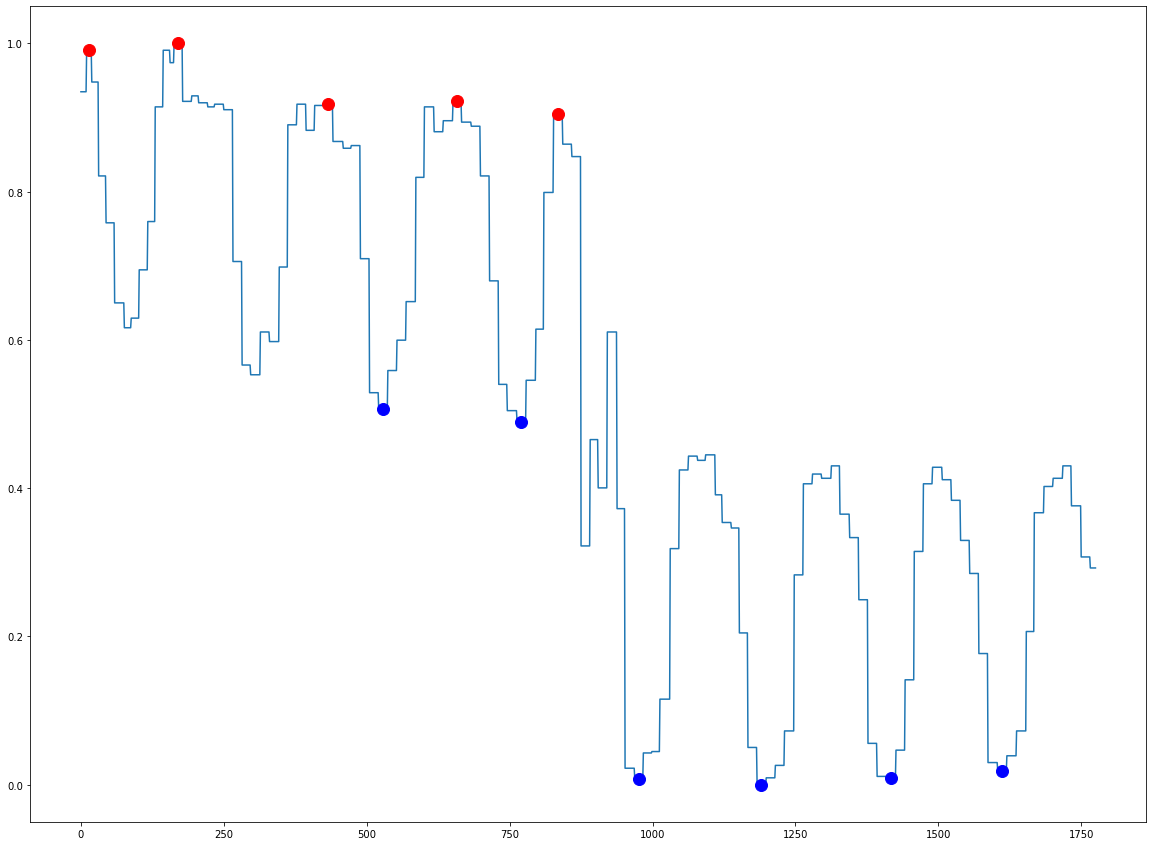

In [309]:
# Using laser to find the sprocket holes

new_cols =['time','intensity'] #data headers
data = pd.DataFrame([(0, 0)], columns=new_cols )

milli_sec = []
analog_value = []     

motDirPin.write(1)
motMS1Pin.write(1)
motMS2Pin.write(1)
motMS3Pin.write(1)
for x in range(1776):
    analog_value.append(laserInt.read())
    milli_sec.append(time.time())
    motStepPin.write(1)
    time.sleep(0.000400)
    motStepPin.write(0)
    time.sleep(0.000400)


arr = np.array(analog_value)
arr = (arr-np.min(arr))/np.max((arr-np.min(arr)))

peaks, _ = find_peaks(arr,distance=140,height= np.mean(arr),prominence=0.01)
arrIn= -1*(arr-np.min(arr) ) +np.max(arr) 
peaksMin, _ = find_peaks(arrIn,distance=140,height= np.mean(arrIn),prominence=0.01)

fig, ax = plt.subplots(figsize=(20, 15))
plt.plot(arr)
plt.plot(peaks, arr[peaks], "ro",markersize=12)
plt.plot(peaksMin, arr[peaksMin], "bo",markersize=12)

plt.show()  

In [287]:
L=[]
it = heapq.merge(peaks,peaksMin) #iterator consisting of merged elements of a and b
L = list(it) #list made of it
print(L)
np.size(L)-1+abs(arr[0]-arr[L[0]-1])+abs(arr[-1]-arr[L[-1]+1])


[100, 177, 318, 396, 614, 738, 864, 957, 1067, 1176, 1284, 1410, 1471, 1612, 1691]


14.601272534464476

# Automatic Film progress with correction 

In [ ]:
counter=1
while True: 
    motDirPin.write(1)
    motMS1Pin.write(1)
    motMS2Pin.write(1)
    motMS3Pin.write(0)
    milli_sec = []
    analog_value = []
    for x in range(1776):
        analog_value.append(laserInt.read())
        milli_sec.append(time.time())
        motStepPin.write(1)
        time.sleep(0.000500)
        motStepPin.write(0)
        time.sleep(0.000500)
    else:
        time.sleep(0.4)

        arr = np.array(analog_value)
        arr = (arr-np.min(arr))/np.max((arr-np.min(arr)))
        peaks, _ = find_peaks(arr,distance=140,height= np.mean(arr),prominence=0.004)
        arrIn= -1*(arr-np.min(arr) ) +np.max(arr) 
        peaksMin, _ = find_peaks(arrIn,distance=140,height= np.mean(arrIn),prominence=0.004)
        L  = []
        LL = []
        it = heapq.merge(peaks,peaksMin) #iterator consisting of merged elements of a and b
        L  = list(it) #list made of it
        LL = np.size(L)-1+abs(arr[0]-arr[L[0]-1])+abs(arr[-1]-arr[L[-1]+1])
            
        correction= -4.23186587*LL -54.52694598*np.std(arr[peaks]) + 67.45936311465242
            
        if LL<13 or np.std(arr)<0.2:
            print("scanning complete")
            break
        elif counter>45:
            print("scanning should have finished")
            break
                
        if np.std(arr[peaks])>0.03:
            print("data is not ideal for correcting position")
        elif correction<=0:
            my_function(0,round(24*abs(correction)))
        else:
            my_function(1,round(24*abs(correction)))
            
    time.sleep(0.5)
    fig, ax = plt.subplots(figsize=(20, 15))
    plt.plot(arr)
    plt.plot(peaks, arr[peaks], "ro",markersize=12)
    plt.plot(peaksMin, arr[peaksMin], "bo",markersize=12)

plt.show()  
    sw = board.digital[6].read()
    if sw is False:
        input("Make manual correction and Press Enter to continue...")   
    
        
    board.digital[12].write(1)
    time.sleep(0.2)
    board.digital[12].write(0)
    time.sleep(0.5)
    counter=counter+1
    
    sw = board.digital[6].read()
    if sw is False:
        counter=counter-1
        input("Make manual correction and Press Enter to continue...")
    
    def my_function(xx,yy):
        motDirPin.write(xx)
        motMS1Pin.write(1)
        motMS2Pin.write(1)
        motMS3Pin.write(1)
        for x in range(yy):
            motStepPin.write(1)
            motStepPin.write(0)
        else:
            time.sleep(0.2)

In [1150]:
np.std(arr)

0.10340189206513428

# Semi-automatic Film progress with correction using 4 buttons

In [98]:
while True:
    sw = board.digital[6].read()
    sww = board.digital[5].read()
    swww = board.digital[4].read()
    swwww = board.digital[3].read()
        
    if sw is False:
        motDirPin.write(1)
        motMS1Pin.write(1)
        motMS2Pin.write(1)
        motMS3Pin.write(1)
        milli_sec = []
        analog_value = []
        for x in range(1776):
            analog_value.append([laserInt.read()])
            milli_sec.append([time.time()])
            motStepPin.write(1)
            time.sleep(0.000500)
            motStepPin.write(0)
            time.sleep(0.000500)
        else:
            time.sleep(0.4)
            a=[j for sub in analog_value for j in sub]
            arr = np.array(a)
            arr = (arr-np.min(arr))/np.max((arr-np.min(arr)))
            peaks, _ = find_peaks(arr,distance=140,height= np.mean(arr),prominence=0.004)
            arrIn= -1*(arr-np.min(arr) ) +np.max(arr) 
            peaksMin, _ = find_peaks(arrIn,distance=140,height= np.mean(arrIn),prominence=0.004)
            L  = []
            LL = []
            it = heapq.merge(peaks,peaksMin) #iterator consisting of merged elements of a and b
            L  = list(it) #list made of it
            LL = np.size(L)-1+abs(arr[0]-arr[L[0]-1])+abs(arr[-1]-arr[L[-1]+1])
            
            correction= -4.23186587*LL -54.52694598*np.std(arr[peaks]) + 67.45936311465242
            print(correction)
            if LL<13 and np.std(arr)<0.2:
                print("scanning complete")
                break
                
            if np.std(arr[peaks])>0.03:
                print("data is not ideal for correcting position")
            elif correction<=0:
                my_function(0,round(24*abs(correction)))
            else:
                my_function(1,round(24*abs(correction)))
                     
    if sww is False:
        my_function(1,24)

    if swww is False:
        my_function(0,24)
        
    if swwww is False:        
        board.digital[12].write(1)
        time.sleep(1)
        board.digital[12].write(0)
        time.sleep(1)
    
    def my_function(xx,yy):
        motDirPin.write(xx)
        motMS1Pin.write(1)
        motMS2Pin.write(1)
        motMS3Pin.write(1)
        for x in range(yy):
            motStepPin.write(1)
            motStepPin.write(0)
        else:
            time.sleep(0.2)

-10.40205550095088
data is not ideal for correcting position


KeyboardInterrupt: 

In [76]:
np.std(arr[peaks])

0.035910732747188694

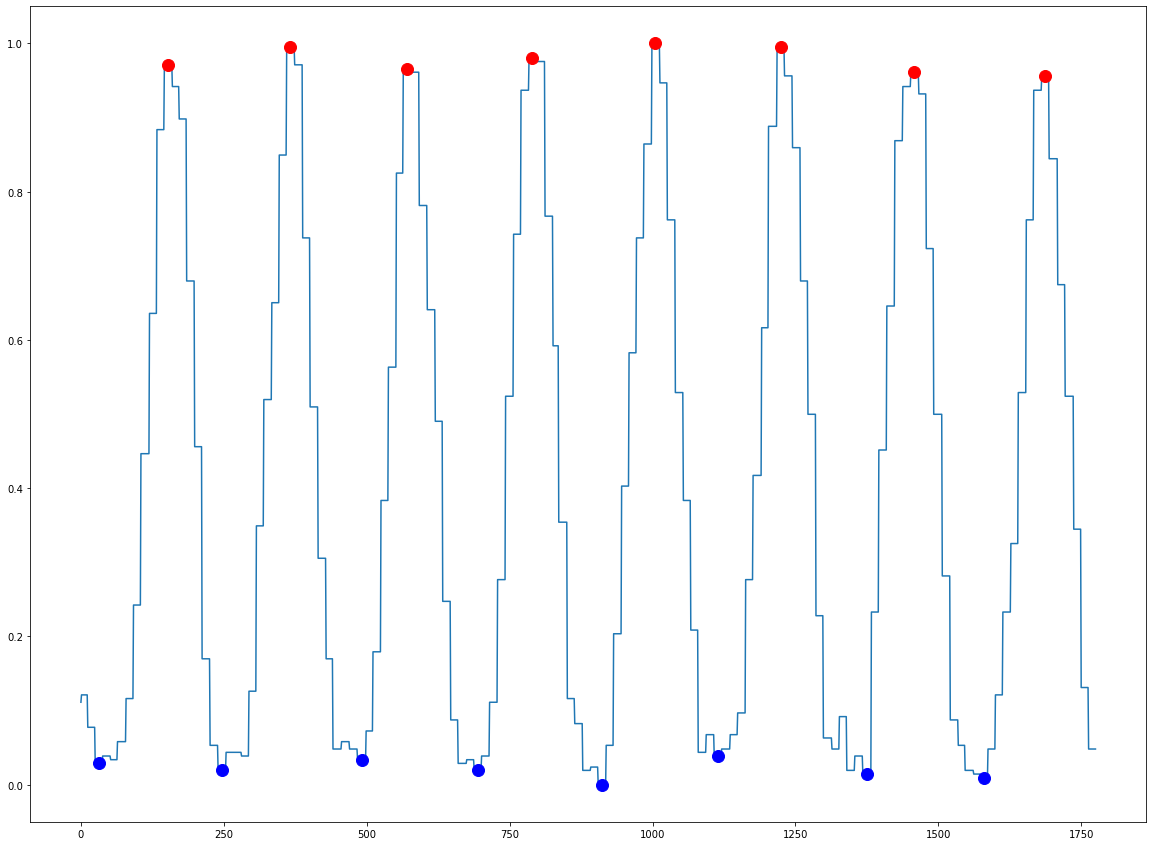

In [93]:
fig, ax = plt.subplots(figsize=(20, 15))
plt.plot(arr)
plt.plot(peaks, arr[peaks], "ro",markersize=12)
plt.plot(peaksMin, arr[peaksMin], "bo",markersize=12)

plt.show()  